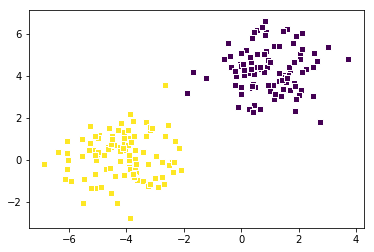

X_train shape : (210, 3)
Y_train shape : (210,)
X_test shape : (90, 3)
y_test shape : (90,)


In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
from math import exp, log 

## Hyper-paramters definition
LR = 0.075
EPOCH = 10
THETA = np.random.normal(0, 0.1, 3).reshape(3, 1) # learnable parameters

## First step: Generating dummy two categories of data.
# 1. data(300)
X, Y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=3)
# show data distribution
# plt.scatter(X[:,0], X[:, 1], c=Y, edgecolors='white', marker='s')
# plt.show()

# 2. split into train/val set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
plt.scatter(X_train[:,0], X_train[:, 1], c=Y_train, edgecolors='white', marker='s')
plt.show()
# for theta0, x0 = 1
o_train = np.ones([X_train.shape[0], 1], dtype=X_train.dtype)
o_test = np.ones([X_test.shape[0], 1], dtype=X_test.dtype)
X_train = np.concatenate((o_train, X_train), axis=1)
X_test = np.concatenate((o_test, X_test), axis=1)
print("X_train shape : {0}".format(X_train.shape))
print("Y_train shape : {0}".format(Y_train.shape))
print("X_test shape : {0}".format(X_test.shape))
print("y_test shape : {0}".format(Y_test.shape))

In [0]:
H_train = np.zeros([Y_train.shape[0], 1])
H_test = np.zeros([Y_test.shape[0], 1])

In [0]:
def sigmoid_function(z):
	
  g = 1 / (1 + exp(-z))

  return g

def hypothesis(x, THETA):
	
	hypothesis = np.matmul(THETA.T, x)
	hypothesis = sigmoid_function(hypothesis[0])

	return hypothesis

In [0]:
def compute_loss(X, Y, THETA):
	
	loss = 0
	for x, y in zip(X, Y):
		h_x = hypothesis(x, THETA)
		# if h_x == 1 --> log(1-1) --> error
		if h_x == 1:
			h_x = 1-0.0000000000001
		loss += (-y) *(log(h_x) - (1-y) *log(1-h_x))

	return loss/(X.shape[0])

In [0]:
def update_parameters(THETA, LR, y, h_x, x):
	
	x = np.reshape(x, THETA.shape)
	THETA = THETA + LR *(y - h_x) * x

	return THETA

[1/10] loss is: 0.007881890583633366
[2/10] loss is: 0.005073498740212336
[3/10] loss is: 0.004017075563368587
[4/10] loss is: 0.003445200435395991
[5/10] loss is: 0.003080562489953772
[6/10] loss is: 0.002824933032766669
[7/10] loss is: 0.0026342132705544133
[8/10] loss is: 0.002485506937013949
[9/10] loss is: 0.0023656820861445247
[10/10] loss is: 0.002266637842668788
[[9.99637749e-01]
 [9.99871759e-01]
 [9.99997797e-01]
 [9.99803952e-01]
 [9.99949452e-01]
 [8.37096654e-05]
 [6.81711420e-04]
 [5.76026911e-04]
 [9.98965631e-01]
 [9.99157646e-01]
 [9.99975591e-01]
 [6.86501404e-08]
 [4.51530235e-02]
 [9.98684745e-01]
 [9.99980039e-01]
 [1.52521494e-04]
 [9.99995278e-01]
 [6.70707976e-03]
 [1.50441872e-04]
 [1.96094839e-06]
 [9.97374746e-01]
 [6.65575548e-05]
 [9.91784766e-01]
 [9.99640624e-01]
 [7.77395141e-04]
 [9.99998931e-01]
 [1.37421630e-05]
 [1.69289277e-04]
 [9.99055938e-01]
 [9.99997071e-01]
 [5.22661658e-04]
 [9.99998971e-01]
 [9.23208494e-05]
 [9.76522879e-01]
 [2.88112458e-0

<Figure size 432x288 with 0 Axes>

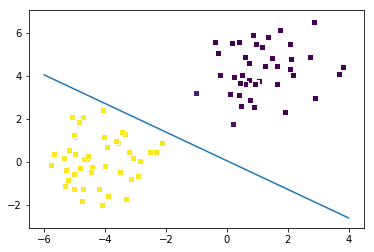

In [0]:
plt.figure(0)
for epoch in range(EPOCH):
  for x, y in zip(X_train, Y_train):
    loss = compute_loss(X_train, Y_train, THETA)
    y_result = hypothesis(x, THETA)
    THETA = update_parameters(THETA, LR, y, y_result, x)
  print('[{0}/{1}] loss is: {2}'.format(epoch+1, EPOCH, loss))

## TEST 
i = 0
for x, y in zip(X_test, Y_test):
  H_test[i] = hypothesis(x, THETA)
  i+=1

plt.figure(1)
x = np.linspace(-7, 4, 50)

# 等值线是 w1 * x + w2 * y + b = 0
x_0 = -6
x_1 = 4
y_0 = -(THETA[2, 0] * x_0 + THETA[0, 0]) / THETA[1, 0]
y_1 = -(THETA[2, 0] * x_1 + THETA[0, 0]) / THETA[1, 0]

plt.plot([x_0, x_1], [y_0, y_1])

plt.scatter(X_test[:, 1], X_test[:, 2], c=H_test[:, 0], edgecolors='white', marker='s')
plt.show()